In [1]:
import pandas as pd
import numpy as np

pd.options.display.float_format = '{:20,.2f}'.format

RENT = 1100
EXPENDABLE_INCOME = 2000
TAXES_PCT = 1
INTEREST_RATE_PCT = 3
RESERVES_PCT = 1
PROPERTY_BUY_VALUE = 500000
CAPTIAL = 100000
BUY_VALUE = 500000
EXPECTED_STOCK_MARKET_RETURNS = 0.05
EXPECTED_HOUSING_MARKET_RETURNS = 0.03



def buy_by_year(year):
    
    #-CAPTIAL + 
    return year ** 2


def calc_rent_stock_returns(max_year, captial, exp_stock_returns, expendable_income, rent):
    depot = (1 + exp_stock_returns/12) * np.ones(max_year * 12)
    depot = np.cumprod(depot) / (1 + exp_stock_returns/12)
    depot = ((expendable_income - rent) * depot)
    depot = np.cumsum(depot)
    depot = depot.reshape(max_year,12)[:,11]


    start_captial = (1 + exp_stock_returns/12) * np.ones(max_year * 12)
    start_captial = np.cumprod(start_captial) * captial 
    start_captial = start_captial.reshape(max_year,12)[:,11]

    depot += start_captial
    
    return depot


def calc_rent_spent(max_year, rent, exp_rent_increase):
    rent_increase = (1 + exp_rent_increase) * np.ones(max_year)
    rent_increase = np.cumprod(rent_increase) / (1 + exp_rent_increase)
    rent_spent = np.cumsum(rent * 12 * rent_increase)

    return rent_spent

def debt(max_year, interest_rate, buying_cost, capital, side_cost, expendable_income):
    annuity = expendable_income * 3
    credit_len = 0
    rest_credit = buying_cost * (1 + side_cost) - capital
    result = np.zeros(max_year * 4)
    while(rest_credit > 0):
        rest_credit = rest_credit * (1 + interest_rate/4) - annuity
        result[credit_len] = rest_credit if rest_credit > 0 else 0
        credit_len += 1

    result = result.reshape(60,4)[:,3]
    return result

def calc_table(max_year, rent=1100, expendable_income=2000, taxes=0.01,
               interest_rate=0.03, reserves_per_year=0.01, property_value=500000, capital=100000, side_cost=0.10,
               avg_stock_market_returns=0.07, avg_housing_market_returns=0.03, exp_rent_increase=0.01):
    rentAmounts = []
    rentSpentAmounts = calc_rent_spent(max_year, rent, exp_rent_increase)
    rentStockReturnsAmounts = calc_rent_stock_returns(max_year, capital, avg_stock_market_returns, expendable_income, rent)
    debts = debt(max_year, interest_rate, property_value, capital, side_cost, expendable_income)
    buyAmounts = []
    for year in range(0, max_year):  #this is probaby slow. Can probably be faster in numpy
        rentAmounts.append(rentStockReturnsAmounts[year] - rentSpentAmounts[year])
        buyAmounts.append(buy_by_year(year))

    return pd.DataFrame({'buy': buyAmounts, 'rent': rentAmounts, 'rent_spent': rentSpentAmounts,
                         'rent_stock_returns': rentStockReturnsAmounts, 'buy_debt': debts
                        'buy_value_increase': debts, 'buy_reserves': debts})

In [2]:
calc_table(60).tail()

,buy,rent,rent_spent,rent_stock_returns,buy_debt
55,3025,"11,532,222.94","984,468.96","12,516,691.90",0.00
56,3136,"12,425,164.25","1,007,513.65","13,432,677.90",0.00
57,3249,"13,384,091.81","1,030,788.79","14,414,880.60",0.00
58,3364,"14,413,790.13","1,054,296.68","15,468,086.81",0.00
59,3481,"15,519,389.74","1,078,039.64","16,597,429.38",0.00


In [3]:
buying_costs = 400_000 * 1.10
EK = 10_000
credit = buying_costs - EK
annuity = 2000 * 3
interest_rate = 0.03

credit_len = 0
rest_credit = credit
result = np.zeros(60 * 4)
while(rest_credit > 0):
    rest_credit = rest_credit * (1 + 0.03/4) - annuity
    result[credit_len] = rest_credit if rest_credit > 0 else 0
    credit_len += 1

result = result.reshape(60,4)[:,3]
result

array([418774.4994543 , 407208.42630724, 395291.44786174, 383012.91793504,
       370361.86734782, 357326.99412473, 343896.65339765, 330058.84700256,
       315801.21276088, 301111.01343553, 285975.12535195, 270380.02667393,
       254311.78532369, 237756.0465355 , 220698.02003162, 203122.46680929,
       185013.68552673, 166355.49847613, 147131.23713116, 127323.72725588,
       106915.2735619 ,  85887.64390015,  64222.05297287,  41899.1455516 ,
        18898.9791859 ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,  

In [8]:
import matplotlib.pyplot as plt

from matplotlib.figure import Figure


def plot(max_year, rent, expendable_income, taxes, interest_rate, reserves_per_year, property_value, capital, side_cost,
         avg_stock_market_returns, avg_housing_market_returns, exp_rent_increase):
    df = calc_table(max_year, rent, expendable_income, taxes, interest_rate, reserves_per_year, property_value, capital, side_cost,
                    avg_stock_market_returns, avg_housing_market_returns, exp_rent_increase)
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot()
    plt.plot(df["rent"], label="rent")
    # plt.plot(df["rent_spent"], label="rent spent")
    # plt.plot(df["rent_stock_returns"], label="rent stock returns")
    plt.plot(df["buy_debt"], label="buy debt")
    plt.ticklabel_format(style='plain')
    plt.legend()
    return fig

Traceback (most recent call last):
 File "/Users/strasserp/dev/rent-or-buy-calculator/venv/lib/python3.10/site-packages/pyviz_comms/__init__.py", line 346, in _handle_msg
 self._on_msg(msg)
 File "/Users/strasserp/dev/rent-or-buy-calculator/venv/lib/python3.10/site-packages/panel/viewable.py", line 297, in _on_msg
 doc.unhold()
 File "/Users/strasserp/dev/rent-or-buy-calculator/venv/lib/python3.10/site-packages/bokeh/document/document.py", line 799, in unhold
 self.callbacks.unhold()
 File "/Users/strasserp/dev/rent-or-buy-calculator/venv/lib/python3.10/site-packages/bokeh/document/callbacks.py", line 396, in unhold
 self.trigger_on_change(event)
 File "/Users/strasserp/dev/rent-or-buy-calculator/venv/lib/python3.10/site-packages/bokeh/document/callbacks.py", line 373, in trigger_on_change
 invoke_with_curdoc(doc, event.callback_invoker)
 File "/Users/strasserp/dev/rent-or-buy-calculator/venv/lib/python3.10/site-packages/bokeh/document/callbacks.py", line 408, in invoke_with_curdoc
 return f()
 File "/Users/strasserp/dev/rent-or-buy-calculator/venv/lib/python3.10/site-packages/bokeh/util/callback_manager.py", line 191, in invoke
 callback(attr, old, new)
 File "/Users/strasserp/dev/rent-or-buy-calculator/venv/lib/python3.10/site-packages/panel/reactive.py", line 405, in _comm_change
 state._handle_exception(e)
 File "/Users/strasserp/dev/rent-or-buy-calculator/venv/lib/python3.10/site-packages/panel/io/state.py", line 399, in _handle_exception
 raise exception
 File "/Users/strasserp/dev/rent-or-buy-calculator/venv/lib/python3.10/site-packages/panel/reactive.py", line 403, in _comm_change
 self._schedule_change(doc, comm)
 File "/Users/strasserp/dev/rent-or-buy-calculator/venv/lib/python3.10/site-packages/panel/reactive.py", line 385, in _schedule_change
 self._change_event(doc)
 File "/Users/strasserp/dev/rent-or-buy-calculator/venv/lib/python3.10/site-packages/panel/reactive.py", line 381, in _change_event
 self._process_events(events)
 File "/Users/strasserp/dev/rent-or-buy-calculator/venv/lib/python3.10/site-packages/panel/reactive.py", line 319, in _process_events
 self.param.update(**self_events)
 File "/Users/strasserp/dev/rent-or-buy-calculator/venv/lib/python3.10/site-packages/param/parameterized.py", line 1898, in update
 self_._batch_call_watchers()
 File "/Users/strasserp/dev/rent-or-buy-calculator/venv/lib/python3.10/site-packages/param/parameterized.py", line 2059, in _batch_call_watchers
 self_._execute_watcher(watcher, events)
 File "/Users/strasserp/dev/rent-or-buy-calculator/venv/lib/python3.10/site-packages/param/parameterized.py", line 2021, in _execute_watcher
 watcher.fn(*args, **kwargs)
 File "/Users/strasserp/dev/rent-or-buy-calculator/venv/lib/python3.10/site-packages/panel/interact.py", line 138, in update_pane
 new_object = self.object(**self.kwargs)
 File "/var/folders/fg/m19k8gh923j4jlzfs9g1zbt5syh569/T/ipykernel_8642/2468443550.py", line 8, in plot
 df = calc_table(max_year, rent, expendable_income, taxes, interest_rate, reserves_per_year, property_value, capital, side_cost,
 File "/var/folders/fg/m19k8gh923j4jlzfs9g1zbt5syh569/T/ipykernel_8642/3413161862.py", line 68, in calc_table
 debts = debt(max_year, interest_rate, property_value, capital, side_cost, expendable_income)
 File "/var/folders/fg/m19k8gh923j4jlzfs9g1zbt5syh569/T/ipykernel_8642/3413161862.py", line 56, in debt
 result[credit_len] = rest_credit if rest_credit > 0 else 0
IndexError: index 240 is out of bounds for axis 0 with size 240

Column
    [0] Markdown(str)
    [1] Row
        [0] Column
            [0] IntSlider(end=60, name='max_year', value=60)
            [1] IntSlider(end=3000, name='rent', start=800, step=50, value=1100)
            [2] IntSlider(end=3000, name='expendable_income', start=1500, step=100, value=2000)
            [3] FloatSlider(end=0.03, name='taxes', start=-0.01, value=0.01)
            [4] FloatSlider(end=0.09, name='interest_rate', start=-0.03, value=0.03)
            [5] FloatSlider(end=0.03, name='reserves_per_year', start=-0.01, value=0.01)
            [6] IntSlider(end=1500000, name='property_value', start=250000, step=10000, value=500000)
            [7] IntSlider(end=500000, name='capital', step=10000, value=100000)
            [8] FloatSlider(end=0.2, name='side_cost', start=0.01, value=0.01)
            [9] FloatSlider(end=0.2, name='avg_stock_market_returns'..., step=0.01, value=0.07)
            [10] FloatSlider(end=0.09, name='avg_housing_market_return..., start=-0.03, value=0.03)
            [11] FloatSlider(name='exp_rent_increase', step=0.01, value=0.01)
        [1] Row
            [0] Matplotlib(Figure, height=1080, name='interactive00215', width=1080)
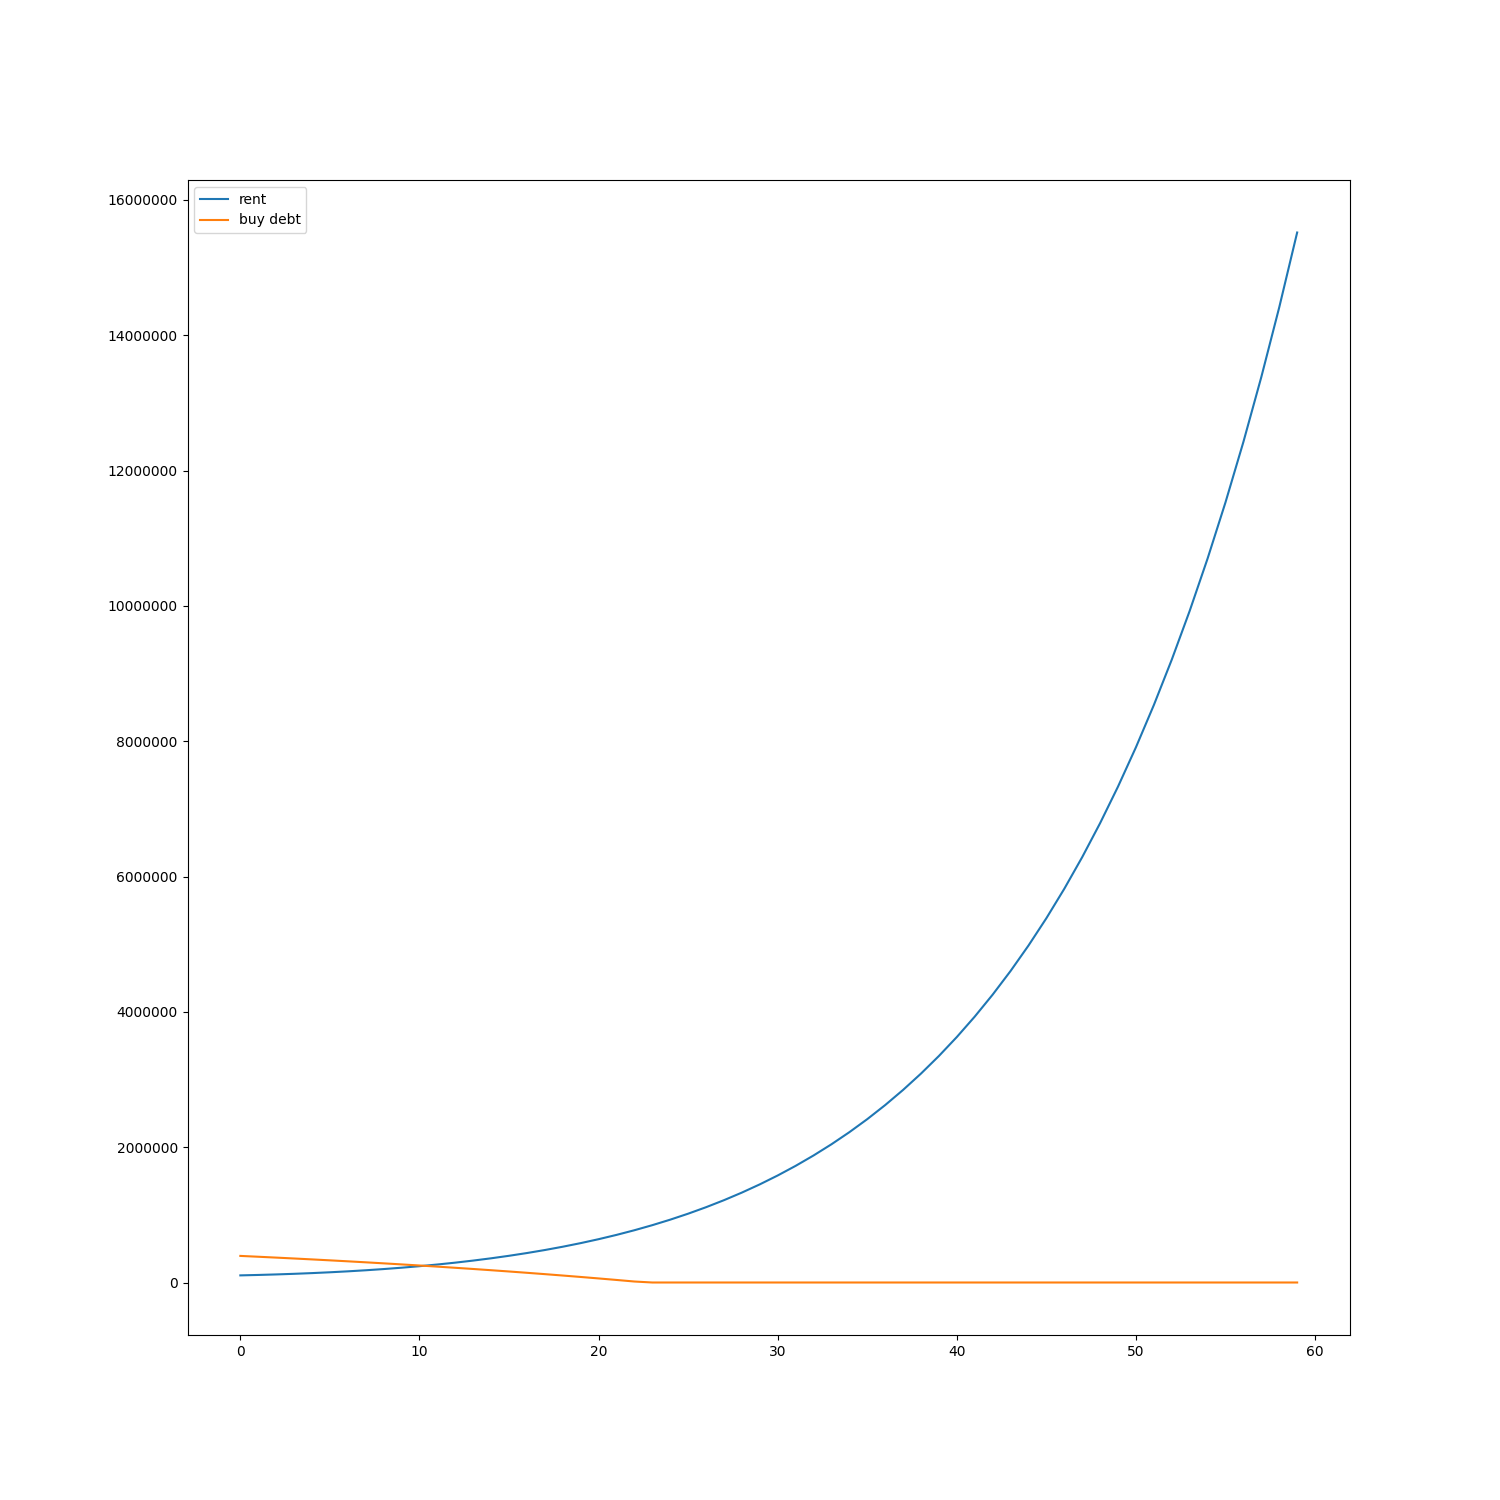

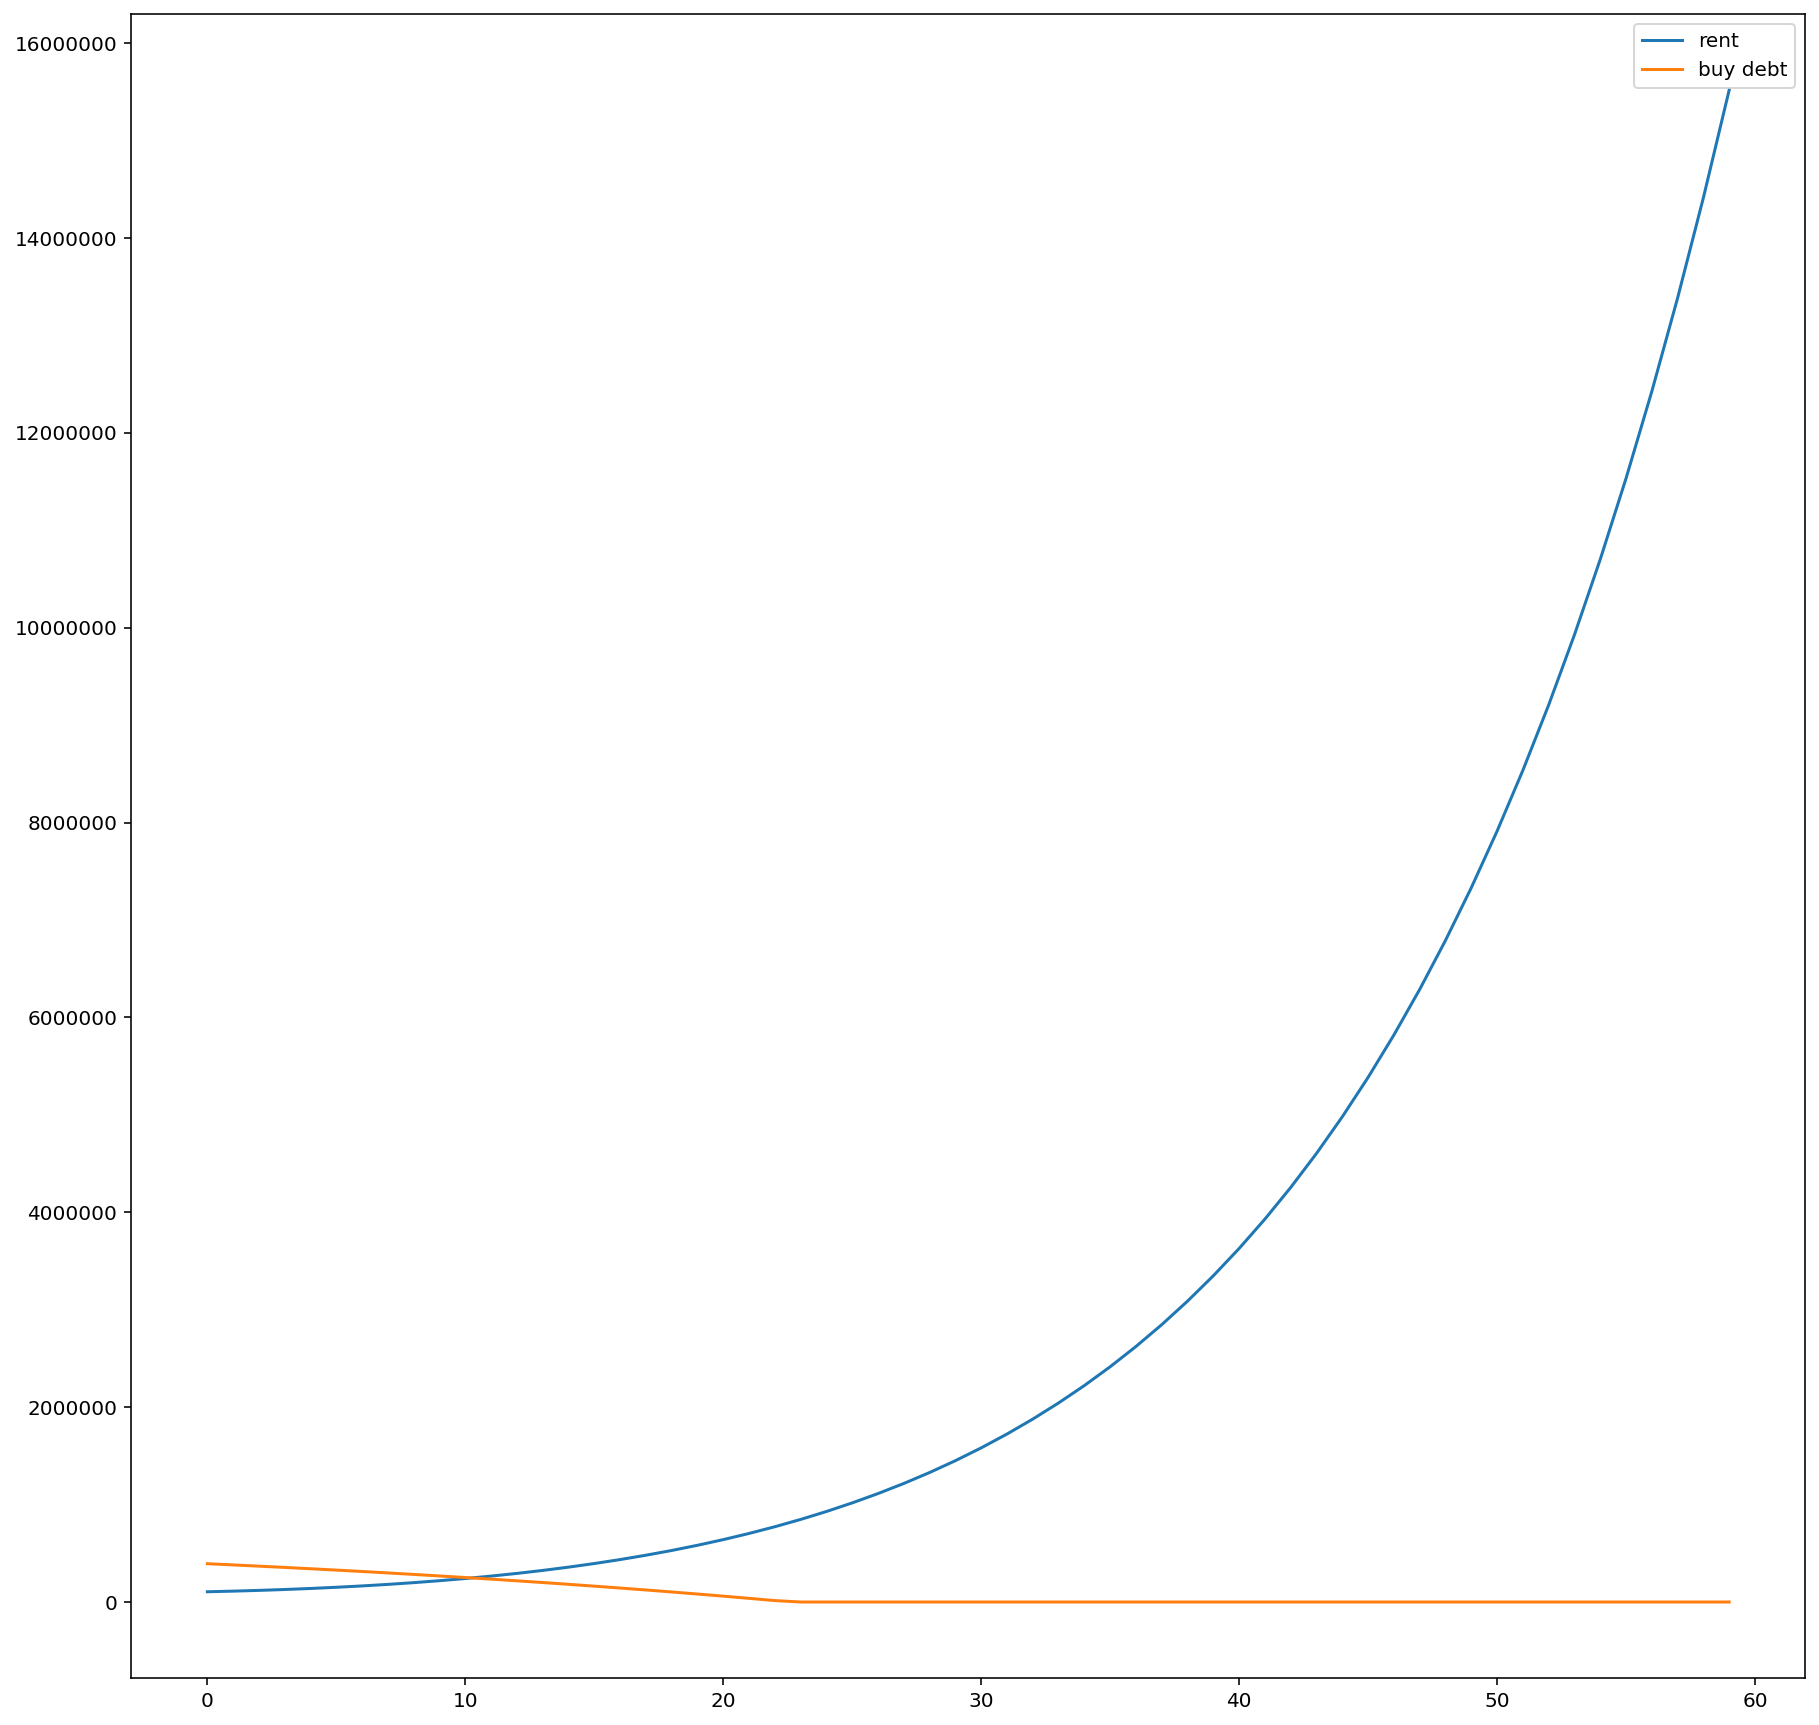

In [10]:
import panel as pn

from panel.interact import interact, interactive, fixed, interact_manual
from panel import widgets

pn.extension()

layout = interact(plot, max_year=(0, 60, 1, 60), rent=(800, 3000, 50, 1100), expendable_income=(1500, 3000, 100, 2000),
                  taxes=0.01, interest_rate=0.03, reserves_per_year=0.01, property_value=(250000, 1500000, 10000, 500000),
                  capital=(0, 500000, 10000, 100000), side_cost=(0.01, 0.20, 0.1, 0.10), avg_stock_market_returns=(0,0.2,0.01,0.07), avg_housing_market_returns=0.03, exp_rent_increase=(0, 1, 0.01, 0.01))

pn.Column('Buy vs rent over time', pn.Row(layout[0], layout[1]))